In [1]:
import os
import random
import numpy as np

from dynamic_programming.policy_iteration import PolicyIteration
from dynamic_programming.mdp_model import MDPModel
from dynamic_programming.policy import DPPolicy
from envs.env_creator import env_creator
from base_rl.eval_policy import EvalDiscreteStatePolicy
from envs.plot import plot_industrial_benchmark_trajectories
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = [20, 12]
fixed_digits = 6
experiment_id = random.randrange(111111, 999999, fixed_digits)

## Load Data and MDP Model

In [3]:
from experiments.offline_experiment_configs import OfflineDiscreteRLExperimentConfig

model_names = ['model_aeq-20bits3']

steps_per_episode = 1000
training_episodes = [10, 100, 1000, 10000]
experiment_configs = []


for model_name in model_names:
    for i, training_episode in enumerate(training_episodes):
        experiment_configs.append(
            OfflineDiscreteRLExperimentConfig(
                model_name=model_name,
                model_path=os.path.join('tmp', 'state_quantization', model_name),
                dataset_path=os.path.join("tmp", "offline_rl_trajectories", model_name, "rl_dataset.npy"),
                mdp_path=os.path.join('tmp','policy_iteration','mdp',model_name,f'{training_episode}','mdp_model.pkl'),
                policy_path=os.path.join('tmp','policy_iteration', f'{experiment_id}',model_name, f'{training_episode}','policy.pkl'),
                dataset_size=training_episode*steps_per_episode)
        )
device = 'cpu'
reward_type = 'state_action'

In [4]:
from dynamic_programming.mdp_model import create_mdp_models


for config in experiment_configs:
    create_mdp_models(load_path=config.dataset_path, mdp_save_path=config.mdp_path, reward_function_type=reward_type, device=device, dataset_size=config.dataset_size)

tmp/policy_iteration/mdp/model_aeq-20bits3/10/mdp_model.pkl
-381.6059063415527
10000
1180
Computing Transition Model
Computing Reward Function
tmp/policy_iteration/mdp/model_aeq-20bits3/100/mdp_model.pkl
-349.6023522132111
100000
2426
Computing Transition Model
Computing Reward Function
tmp/policy_iteration/mdp/model_aeq-20bits3/1000/mdp_model.pkl
-344.6461636640358
1000000
3603
Computing Transition Model
Computing Reward Function
tmp/policy_iteration/mdp/model_aeq-20bits3/10000/mdp_model.pkl
-341.13575161187475
10000000
4691
Computing Transition Model
Computing Reward Function


## Train

0
1
# epoch: 3
eval count = [501, 71, 14]
policy change = [1132, 7, 0]


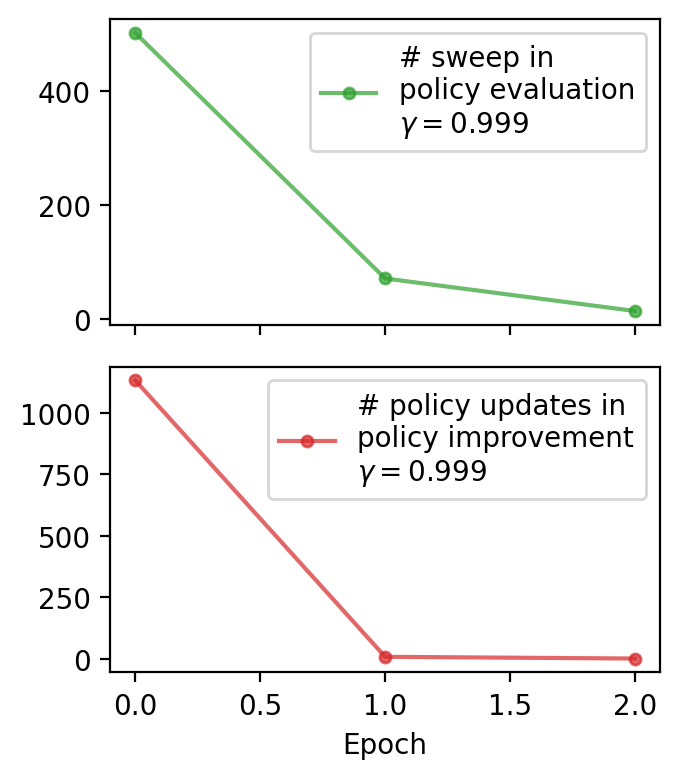

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

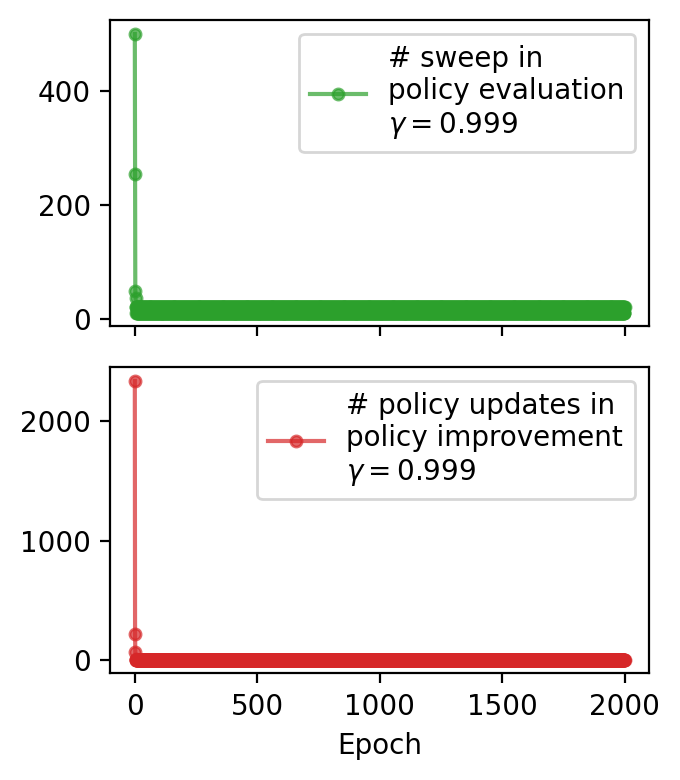

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

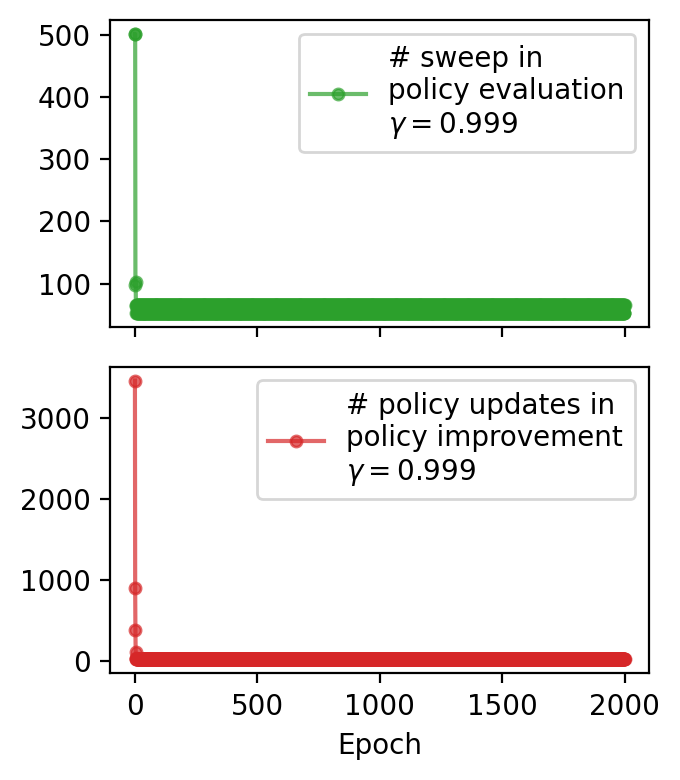

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
def train_policy_iteration(mdp_path, policy_save_path):
    mdp_model = MDPModel.load(mdp_path)
    solver = PolicyIteration(reward_function=mdp_model.reward_function, transition_model=mdp_model.transition_model,
                             gamma=0.999, sa_reward=reward_type)
    solver.train(total_epochs=2000, eval_epochs=500)
    trained_policy = DPPolicy(policy_table=solver.policy, state_to_index=mdp_model.state_to_index,
                              index_to_action=mdp_model.index_to_actions)
    trained_policy.save(policy_save_path)


for config in experiment_configs:
    train_policy_iteration(mdp_path=config.mdp_path, policy_save_path=config.policy_path)

In [ ]:
from benchmarks.policy_benchmarks import PolicyBenchmarks

steps_per_episode = 1000
evaluators = []
for config in experiment_configs:
    print(config.policy_path)
    eval_policy = config.get_saved_policy()
    env_kwargs = {'steps_per_episode': steps_per_episode, 'device': device, 'model_path': config.model_path}
    evaluator = EvalDiscreteStatePolicy(policy=eval_policy, env_creator=env_creator, env_kwargs=env_kwargs,
                                        tag=f'{config.model_name}/{config.dataset_size}')
    evaluators.append(evaluator)

policy_benchmarks = PolicyBenchmarks(evaluators=evaluators, epochs=10)
policy_benchmarks.benchmark()

In [ ]:
plot_industrial_benchmark_trajectories(policy_benchmarks.evaluators[-1].eval_trajectories[0]['info'])

In [ ]:
df = pd.DataFrame(policy_benchmarks.benchmark_metrics)
df.T

In [ ]:

plt.rcParams["figure.figsize"] = [20, 12]


for model_name in model_names:
    m = np.core.defchararray.find(df.columns.values.astype(str), model_name) >= 0
    fdf = df.loc[:, m]
    ax = fdf.plot.bar()

    for container in ax.containers:
        ax.bar_label(container)
    plt.show()